 # Análisis de Componentes Principales para Iris Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)

X = pd.DataFrame(data.data)
y = pd.Series(data.target)

df = pd.concat([X,y], axis=1)

X_cols = X.columns

df['target'] = df['target'].map({i:n for (i,n) in enumerate(['Iris-' + i for i in data.target_names])})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df[X_cols] = ss.fit_transform(df[X_cols])

### PCA de 2 componentes

In [107]:
pca2 = PCA(n_components=2, random_state=42) #pca de dos componentes

In [108]:
pca_2 = pca2.fit_transform(df[X_cols])

In [109]:
pca_2 #vemos que tenemos las columnas de la componente principal 1  y componente principal 2

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [110]:
df_2 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2': pca_2[:,1], 'class': df['target']})
df_2

,PCA1,PCA2,class
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa
...,...,...,...
145,1.870503,0.386966,Iris-virginica
146,1.564580,-0.896687,Iris-virginica
147,1.521170,0.269069,Iris-virginica
148,1.372788,1.011254,Iris-virginica


In [111]:
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [112]:
pca2.explained_variance_ratio_.sum() # Porcentaje (%) total de la varianza total de la variable inicial

0.9581320720000164

<Axes: >

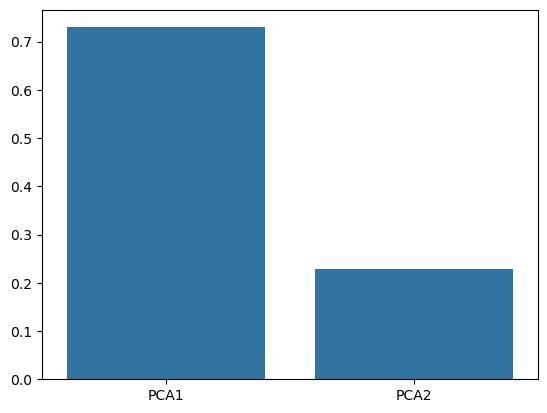

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=['PCA1', 'PCA2'], y=pca2.explained_variance_ratio_)

<Axes: xlabel='PCA1', ylabel='PCA2'>

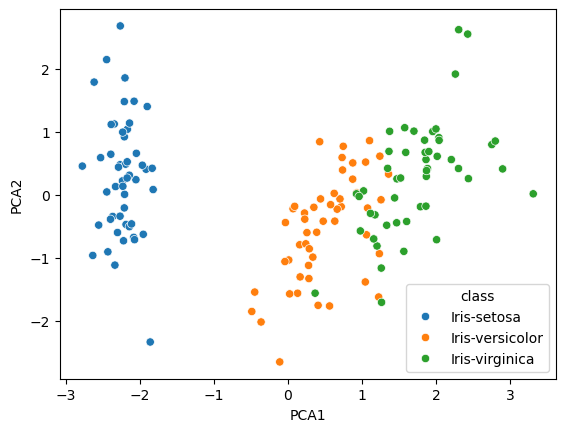

In [96]:
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=df_2)

### PCA de 3 componentes

In [98]:
pca3 = PCA(n_components=3, random_state=42)

In [99]:
pca_3 = pca3.fit_transform(df[X_cols])

In [115]:
pca_3[:4]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011]])

In [116]:
df_3 = pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1], 'PCA3': pca_3[:,2], 'class': df['target']})
df_3.head()

,PCA1,PCA2,PCA3,class
0,-2.264703,0.480027,-0.127706,Iris-setosa
1,-2.080961,-0.674134,-0.234609,Iris-setosa
2,-2.364229,-0.341908,0.044201,Iris-setosa
3,-2.299384,-0.597395,0.091290,Iris-setosa
4,-2.389842,0.646835,0.015738,Iris-setosa


In [103]:
pca3.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [105]:
pca3.explained_variance_ratio_.sum()

0.9948212908928451

<Axes: >

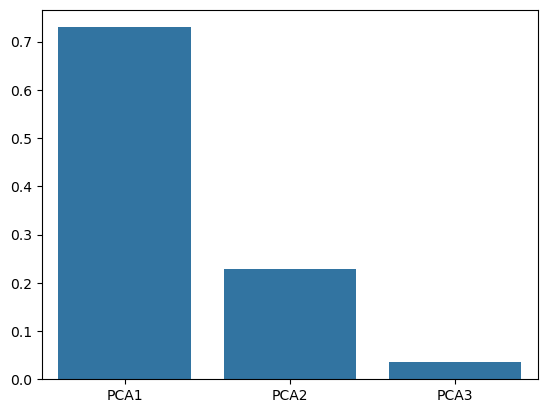

In [114]:
sns.barplot(x=['PCA1', 'PCA2', 'PCA3'], y=pca3.explained_variance_ratio_)

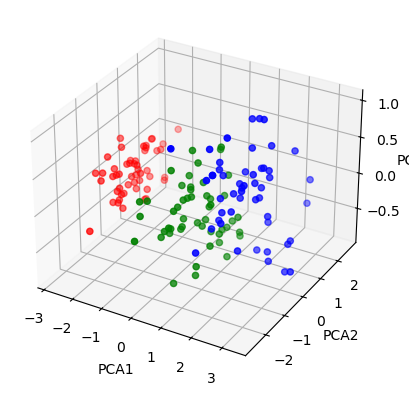

In [121]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']

col = df_3['class'].map({i:n for (i,n) in zip(['Iris-' + i for i in data.target_names], ['r', 'g', 'b'])})

ax.scatter(x,y,z, c=col, marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

La gran utilidad que tiene el **PCA** es que al tener un conjunto de datos multidimensional podemos reducirlo a 1, 2,..., `n_components == min(n_samples, n_features) - 1`, aunque para poder representarlo gráficamente se debe reducir a 2 o 3 dimensiones.
También se puede usar para tener un problema menos complejo con un menor número de variables que explique un porcentaje de la varianza relativamente alto.